<a href="https://colab.research.google.com/github/CHARAN-381/customer-purchase-analysis/blob/main/Customer_Purchase_Analysis_Report.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
file_path = '/content/drive/MyDrive/Colab Notebooks/data.csv'


In [10]:
import pandas as pd
df = pd.read_csv(file_path, encoding='ISO-8859-1')
df.head()


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [2]:
# Cell 1: Define file path

file_path = '/content/drive/MyDrive/Colab Notebooks/data.csv'

# Cell 2: Import pandas and read data

import pandas as pd
df = pd.read_csv(file_path, encoding='ISO-8859-1')
df.head()

# Cell 3: Data Cleaning and Manipulation
# Check data info
df.info()

# Drop rows with nulls
df.dropna(inplace=True)

# Remove negative or zero quantities
df = df[df['Quantity'] > 0]

# Convert InvoiceDate to datetime
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Create TotalPrice column
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']

df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


<ipython-input-2-f565bf30e638>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
<ipython-input-2-f565bf30e638>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['TotalPrice'] = df['Quantity'] * df['UnitPrice']


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [4]:
!pip install pandasql
import pandasql as ps # Import pandasql and assign it to 'ps' for easier use

# Example: Top 5 countries by revenue
query = """
SELECT Country, SUM(TotalPrice) as Revenue
FROM df
GROUP BY Country
ORDER BY Revenue DESC
LIMIT 5
"""
ps.sqldf(query, locals()) # Use 'ps' instead of 'psql' to call sqldf

  Preparing metadata (setup.py) ... done
  Created wheel for pandasql: filename=pandasql-0.7.3-py3-none-any.whl size=26773 sha256=a6b950ea791c1cbb8a8a3e864c1e50d3859025c1a261f1845406fd84f80a8e16
  Stored in directory: /root/.cache/pip/wheels/68/5d/a5/edc271b998f909801d7956959f699b976cc9896075dc47c153
Successfully built pandasql


,Country,Revenue
0,United Kingdom,7.308392e+06
1,Netherlands,2.854463e+05
2,EIRE,2.655459e+05
3,Germany,2.288671e+05
4,France,2.090240e+05


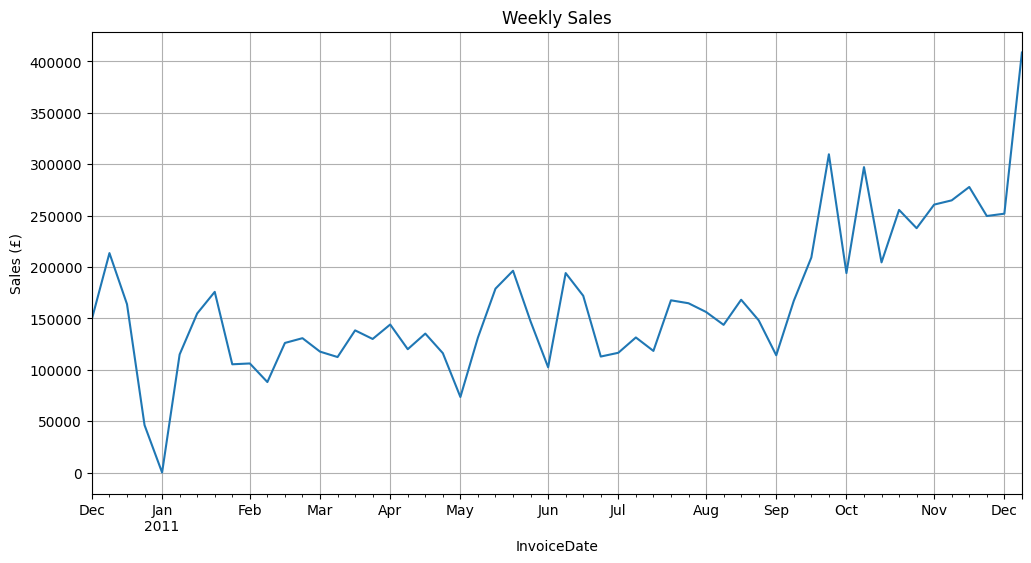

In [6]:
import matplotlib.pyplot as plt # Import the pyplot module from matplotlib

df.set_index('InvoiceDate').resample('W').sum()['TotalPrice'].plot(figsize=(12,6), title='Weekly Sales')
plt.ylabel('Sales (£)') # Now plt is defined and can be used
plt.grid(True)
plt.show()

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandasql as psql

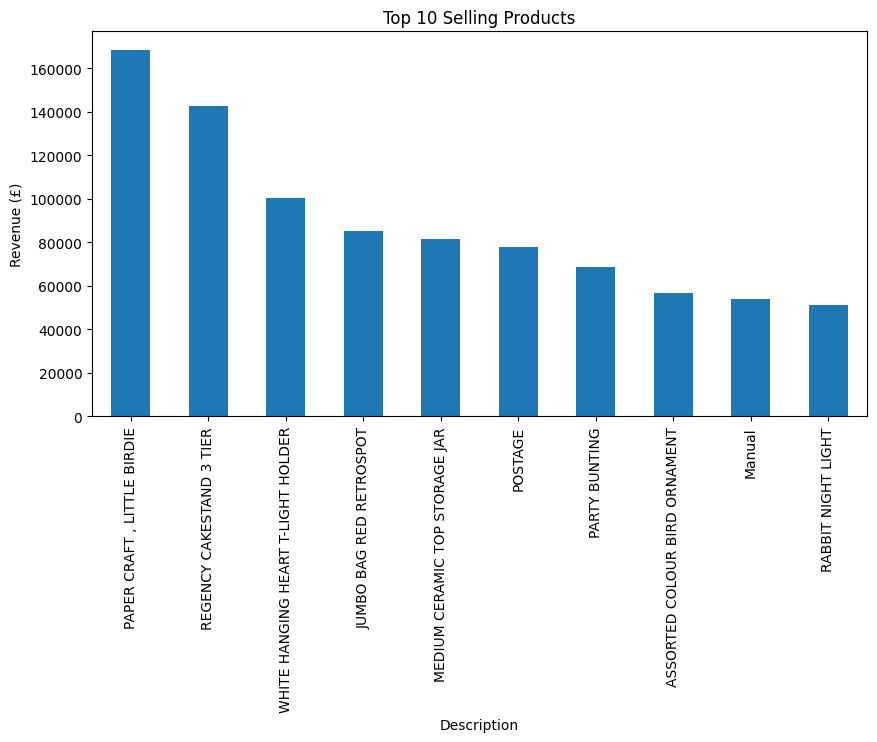

In [8]:
top_products = df.groupby('Description')['TotalPrice'].sum().sort_values(ascending=False).head(10)
top_products.plot(kind='bar', title='Top 10 Selling Products', figsize=(10,5))
plt.ylabel('Revenue (£)')
plt.show()


In [16]:
import pandas as pd
import datetime

# Cell 1: Define file path
file_path = '/content/drive/MyDrive/Colab Notebooks/data.csv'

# Cell 2: Import pandas and read data
df = pd.read_csv(file_path, encoding='ISO-8859-1')

# Cell 3: Data Cleaning and Manipulation.  This has to be run before any aggregation or plotting functions.
# Check data info
df.info()
# Drop rows with nulls
df.dropna(inplace=True)
# Remove negative or zero quantities
df = df[df['Quantity'] > 0]
# Convert InvoiceDate to datetime
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
# Create TotalPrice column
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']

df.head()

#Cell 4: Now you can run pandasql against the updated df
!pip install pandasql
import pandasql as ps # Import pandasql and assign it to 'ps' for easier use
# Example: Top 5 countries by revenue
query = """
SELECT Country, SUM(TotalPrice) as Revenue
FROM df
GROUP BY Country
ORDER BY Revenue DESC
LIMIT 5
"""
ps.sqldf(query, locals()) # Use 'ps' instead of 'psql' to call sqldf

#Cell 5: Now you can run the aggregation
snapshot_date = df['InvoiceDate'].max() + pd.Timedelta(days=1)
rfm = df.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (snapshot_date - x.max()).days,
    'InvoiceNo': 'nunique',
    'TotalPrice': 'sum'
}).rename(columns={
    'InvoiceDate': 'Recency',
    'InvoiceNo': 'Frequency',
    'TotalPrice': 'Monetary'
})
rfm.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


,Recency,Frequency,Monetary
CustomerID,,,
12346.0,326,1,77183.60
12347.0,2,7,4310.00
12348.0,75,4,1797.24
12349.0,19,1,1757.55
12350.0,310,1,334.40
